# RCB vs DC IPL 2024 Analysis 

In [237]:
import pandas as pd

In [238]:
df = pd.read_csv("innings_deliveries.csv")

In [239]:
df.head()

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_out,wicket_kind,fielders
0,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
1,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,1,0,1,NaN,NaN,[]
2,Royal Challengers Bengaluru,0,F du Plessis,I Sharma,V Kohli,1,0,1,NaN,NaN,[]
3,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
4,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,2,0,2,NaN,NaN,[]


In [240]:
df.shape

(247, 11)

In [241]:
df.tail()

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_out,wicket_kind,fielders
242,Delhi Capitals,18,Kuldeep Yadav,Mohammed Siraj,I Sharma,1,0,1,NaN,NaN,[]
243,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,1,1,NaN,NaN,[]
244,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[]
245,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[]
246,Delhi Capitals,19,Kuldeep Yadav,Yash Dayal,I Sharma,0,0,0,Kuldeep Yadav,bowled,[]


In [242]:
df.isnull().sum()

team             0
over             0
batter           0
bowler           0
non_striker      0
runs_batter      0
runs_extras      0
runs_total       0
player_out     228
wicket_kind    228
fielders         0
dtype: int64

The features "player_out" and "wicket_kind" have null values because, in some rows, they indicate which player is out (player_out) and the manner of dismissal (wicket_kind). If we modify these null values, it will affect the integrity of the data. Therefore, we should leave them as they are

# Run distribution per over

In [243]:
# visualization

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns

In [245]:
sns.set_style("whitegrid")

In [246]:
# run distribution per over

run_dist = df.groupby(['team','over']).agg({'runs_total': 'sum'}).reset_index()

In [247]:
run_dist

,team,over,runs_total
0,Delhi Capitals,0,9
1,Delhi Capitals,1,15
2,Delhi Capitals,2,4
3,Delhi Capitals,3,2
4,Delhi Capitals,4,13
5,Delhi Capitals,5,11
6,Delhi Capitals,6,9
7,Delhi Capitals,7,8
8,Delhi Capitals,8,10
9,Delhi Capitals,9,6


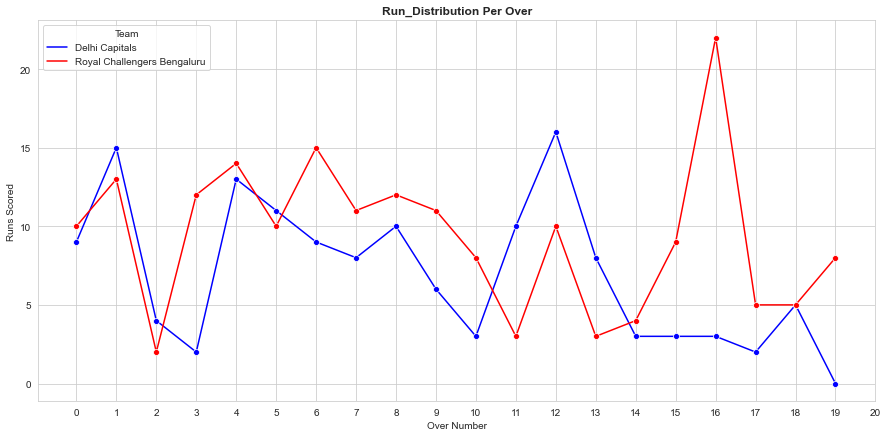

In [248]:
custom_palette = ['Blue', 'red']

plt.figure(figsize=(15,7))
sns.lineplot(data= run_dist, x='over', y='runs_total',hue = 'team', marker='o',palette=custom_palette)
plt.title('Run_Distribution Per Over', fontweight ="bold")
plt.xlabel('Over Number')
plt.ylabel('Runs Scored')
plt.xticks(range(0,21))
plt.legend(title='Team')
plt.show()

In [249]:
# wicket dismissal

run_wicket_dist = df.groupby(['team', 'over']).agg({'runs_total': 'sum', 'wicket_kind': 'sum'}).reset_index()


In [250]:
run_wicket_dist

,team,over,runs_total,wicket_kind
0,Delhi Capitals,0,9,caught
1,Delhi Capitals,1,15,0
2,Delhi Capitals,2,4,caughtrun out
3,Delhi Capitals,3,2,lbw
4,Delhi Capitals,4,13,0
5,Delhi Capitals,5,11,0
6,Delhi Capitals,6,9,0
7,Delhi Capitals,7,8,0
8,Delhi Capitals,8,10,0
9,Delhi Capitals,9,6,caught


# Top Scorers for each team

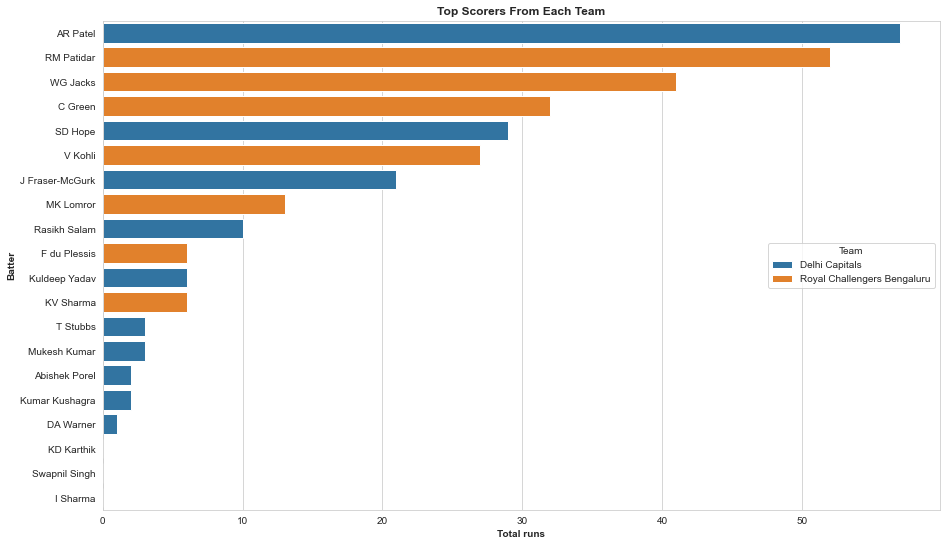

In [251]:
# Top Scorers for each team
top_scorers = df.groupby(['team','batter']).agg({'runs_batter':'sum'}).reset_index().sort_values(by='runs_batter', ascending = False)

plt.figure(figsize=(15,9))
sns.barplot(data = top_scorers, x = 'runs_batter', y = 'batter', hue = 'team', dodge = False)
plt.title('Top Scorers From Each Team',fontweight='bold')
plt.xlabel('Total runs',fontweight='bold')
plt.ylabel('Batter',fontweight='bold')
plt.legend(title = 'Team', loc = 'center right')
plt.show()

# Bowling Analysis

In [252]:
# Bowling Analysis

df['wickets_taken']= df['wicket_kind'].notna().astype(int)


In [253]:
df

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_out,wicket_kind,fielders,wickets_taken
0,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[],0
1,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,1,0,1,NaN,NaN,[],0
2,Royal Challengers Bengaluru,0,F du Plessis,I Sharma,V Kohli,1,0,1,NaN,NaN,[],0
3,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[],0
4,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,2,0,2,NaN,NaN,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...
242,Delhi Capitals,18,Kuldeep Yadav,Mohammed Siraj,I Sharma,1,0,1,NaN,NaN,[],0
243,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,1,1,NaN,NaN,[],0
244,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[],0
245,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[],0


In [254]:
bowling_stats = df.groupby(['team','bowler']).agg({'runs_total':"sum","wickets_taken":"sum", "over":"nunique"}).reset_index()

In [255]:
bowling_stats

,team,bowler,runs_total,wickets_taken,over
0,Delhi Capitals,C Green,19,2,4
1,Delhi Capitals,KV Sharma,19,0,2
2,Delhi Capitals,LH Ferguson,24,2,4
3,Delhi Capitals,Mohammed Siraj,33,1,4
4,Delhi Capitals,Swapnil Singh,9,1,1
5,Delhi Capitals,WG Jacks,16,0,1
6,Delhi Capitals,Yash Dayal,20,4,4
7,Royal Challengers Bengaluru,AR Patel,24,0,3
8,Royal Challengers Bengaluru,I Sharma,31,1,3
9,Royal Challengers Bengaluru,KK Ahmed,32,2,4


In [256]:
# calculating economy rate (total runs conceded / number of overs bowled)
bowling_stats['economy_rate'] = bowling_stats['runs_total'] / bowling_stats['over']

In [257]:
bowling_stats

,team,bowler,runs_total,wickets_taken,over,economy_rate
0,Delhi Capitals,C Green,19,2,4,4.750000
1,Delhi Capitals,KV Sharma,19,0,2,9.500000
2,Delhi Capitals,LH Ferguson,24,2,4,6.000000
3,Delhi Capitals,Mohammed Siraj,33,1,4,8.250000
4,Delhi Capitals,Swapnil Singh,9,1,1,9.000000
5,Delhi Capitals,WG Jacks,16,0,1,16.000000
6,Delhi Capitals,Yash Dayal,20,4,4,5.000000
7,Royal Challengers Bengaluru,AR Patel,24,0,3,8.000000
8,Royal Challengers Bengaluru,I Sharma,31,1,3,10.333333
9,Royal Challengers Bengaluru,KK Ahmed,32,2,4,8.000000


In [258]:
#sort the data for better visualization

bowling_stats_sorted = bowling_stats.sort_values(by='wickets_taken', ascending = False)

In [259]:
bowling_stats_sorted

,team,bowler,runs_total,wickets_taken,over,economy_rate
6,Delhi Capitals,Yash Dayal,20,4,4,5.000000
11,Royal Challengers Bengaluru,Mukesh Kumar,24,3,3,8.000000
0,Delhi Capitals,C Green,19,2,4,4.750000
2,Delhi Capitals,LH Ferguson,24,2,4,6.000000
9,Royal Challengers Bengaluru,KK Ahmed,32,2,4,8.000000
12,Royal Challengers Bengaluru,Rasikh Salam,23,2,3,7.666667
3,Delhi Capitals,Mohammed Siraj,33,1,4,8.250000
4,Delhi Capitals,Swapnil Singh,9,1,1,9.000000
8,Royal Challengers Bengaluru,I Sharma,31,1,3,10.333333
10,Royal Challengers Bengaluru,Kuldeep Yadav,53,1,4,13.250000


In [260]:
# prepare data frame

bowling_stats_sorted['wickets_taken'] = df['wicket_kind'].notna().astype(int)

In [261]:
bowling_stats = df.groupby(['team','bowler']).agg({'runs_total':'sum', 'wickets_taken': 'sum','over':'nunique'}).reset_index()

In [262]:
bowling_stats['economy_rate']= bowling_stats['runs_total'] / bowling_stats['over']

In [263]:
bowling_stats_sorted = bowling_stats.sort_values(by='wickets_taken', ascending=False)

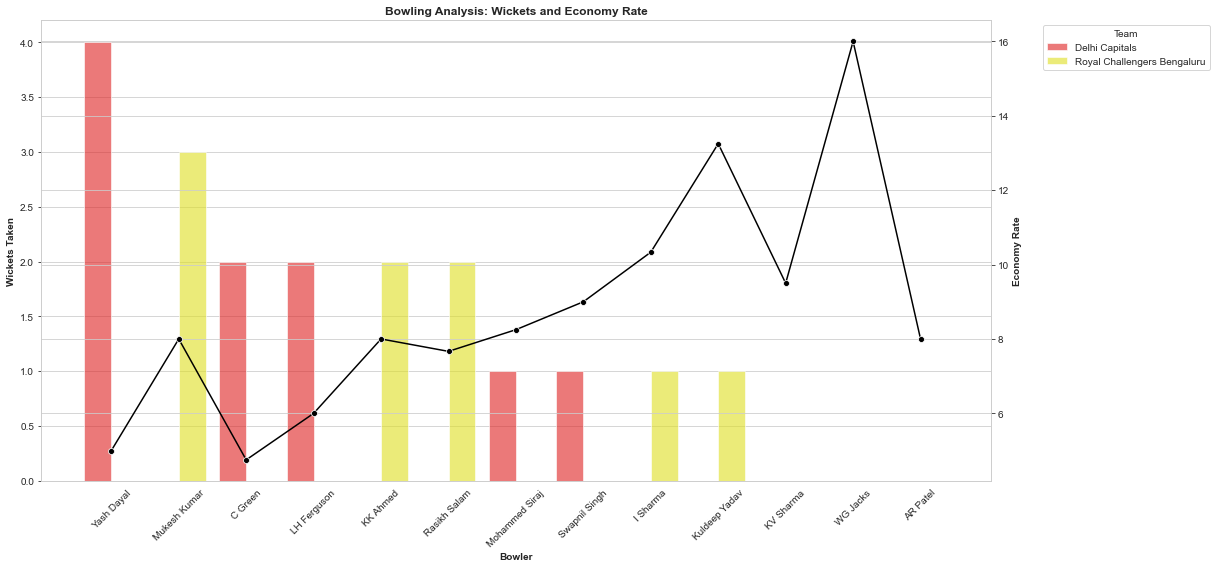

In [264]:
# create plot
custom_palette = ['red', 'yellow']
fig, ax1 = plt.subplots(figsize=(17,8))

# bar plot

sns.barplot(data=bowling_stats_sorted, x ='bowler', y="wickets_taken", hue="team", ax = ax1, alpha=0.6, palette=custom_palette)

ax1.set_ylabel('Wickets Taken',fontweight='bold')
ax1.set_xlabel("Bowler",fontweight='bold')
ax1.set_title("Bowling Analysis: Wickets and Economy Rate",fontweight='bold')
ax1.legend(title = 'Team', bbox_to_anchor =(1.05,1), loc='upper left')


for item in ax1.get_xticklabels():
    item.set_rotation(45)
    
ax2 = ax1.twinx()
sns.lineplot(data = bowling_stats_sorted, x = 'bowler', y= 'economy_rate', marker ='o', sort = False, ax=ax2, color = 'black')
ax2.set_ylabel("Economy Rate",fontweight='bold')

plt.tight_layout()
plt.show()

The bars indicate the number of wickets each bowler took during the match
The line graph overlaid on the bar graph shows the economy rate (number of runs conceded per over) of each bowler

# Types of Dismissal and their percentange

In [265]:
# dismissal types

dismissal_types = df['wicket_kind'].dropna().value_counts()

In [266]:
dismissal_types

caught     13
run out     4
lbw         1
bowled      1
Name: wicket_kind, dtype: int64

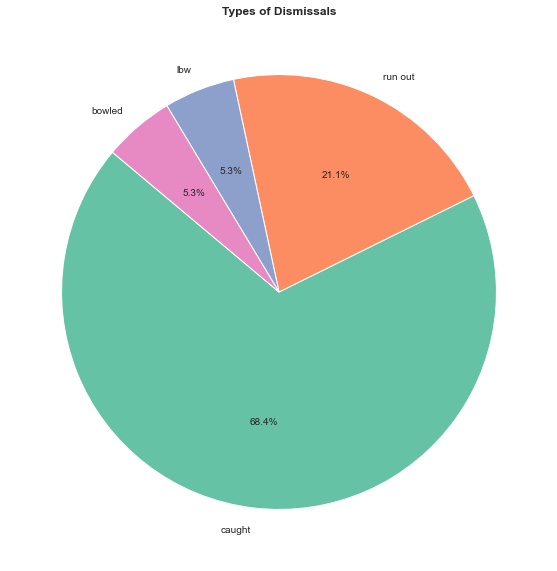

In [267]:

plt.figure(figsize=(10, 10))
plt.pie(dismissal_types, labels=dismissal_types.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Types of Dismissals', fontweight='bold')
plt.show()

# Partnerships

In [268]:
# calculate partnerships

In [269]:
def calculate_partnerships(df):
    partnerships = []
    current_partnership = {}
    for i , row in df.iterrows():
        if i == 0 or (row['batter'] not in current_partnership.values()):
            if current_partnership:
                partnerships.append(current_partnership)
            current_partnership = {
                'team' : row['team'],
                'batter1': row['batter'],
                'batter2': row['non_striker'],
                'runs':0,
                'balls':0
            }
        current_partnership['runs'] += row['runs_total']
        current_partnership['balls'] += 1
        if 'player_out' in row and pd.notna(row['player_out']):
            if row ['player_out'] == current_partnership['batter1'] or row['player_out'] == current_partnership['batter2']:
                partnerships.append(current_partnership)
                current_partnership = {}
                
    # append last partnership if not ended by wicket
    
    if current_partnership:
        partnerships.append(current_partnership)
    return partnerships

# calculate

partnerships_data = calculate_partnerships(df)
partnerships_df = pd.DataFrame(partnerships_data)

In [270]:
partnerships_df

,team,batter1,batter2,runs,balls
0,Royal Challengers Bengaluru,V Kohli,F du Plessis,23,14
1,Royal Challengers Bengaluru,WG Jacks,V Kohli,13,9
2,Royal Challengers Bengaluru,RM Patidar,WG Jacks,88,56
3,Royal Challengers Bengaluru,C Green,WG Jacks,13,13
4,Royal Challengers Bengaluru,MK Lomror,C Green,37,20
5,Royal Challengers Bengaluru,KD Karthik,C Green,0,2
6,Royal Challengers Bengaluru,C Green,Swapnil Singh,2,4
7,Royal Challengers Bengaluru,KV Sharma,C Green,9,8
8,Royal Challengers Bengaluru,C Green,Mohammed Siraj,2,1
9,Delhi Capitals,DA Warner,J Fraser-McGurk,8,4


In [271]:
# filter partner ship more than 20

significant_partnerships = partnerships_df[partnerships_df['runs']>20]

In [272]:
significant_partnerships

,team,batter1,batter2,runs,balls
0,Royal Challengers Bengaluru,V Kohli,F du Plessis,23,14
2,Royal Challengers Bengaluru,RM Patidar,WG Jacks,88,56
4,Royal Challengers Bengaluru,MK Lomror,C Green,37,20
13,Delhi Capitals,AR Patel,SD Hope,56,37
15,Delhi Capitals,Rasikh Salam,AR Patel,37,24


In [273]:
# sort  by high run

significant_partnerships = significant_partnerships.sort_values(by = 'runs', ascending = False)

In [274]:
significant_partnerships

,team,batter1,batter2,runs,balls
2,Royal Challengers Bengaluru,RM Patidar,WG Jacks,88,56
13,Delhi Capitals,AR Patel,SD Hope,56,37
4,Royal Challengers Bengaluru,MK Lomror,C Green,37,20
15,Delhi Capitals,Rasikh Salam,AR Patel,37,24
0,Royal Challengers Bengaluru,V Kohli,F du Plessis,23,14


In [275]:
# Visualize

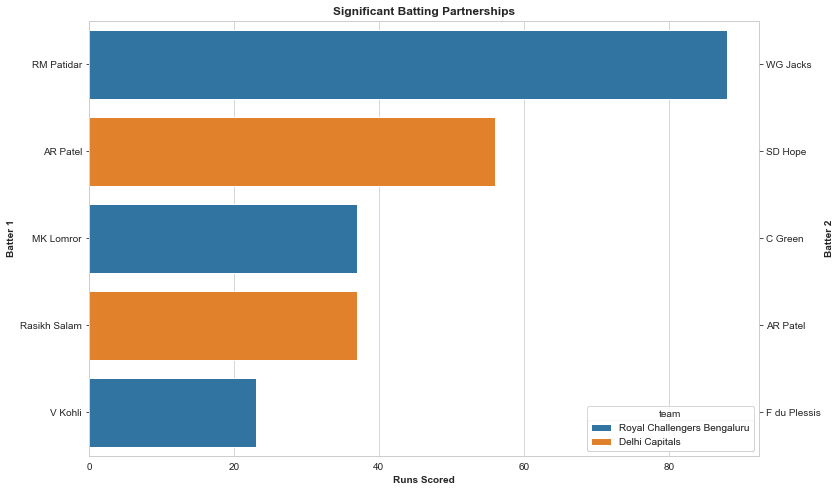

In [276]:
plt.figure(figsize=(12, 8))

# Create a barplot for batter1
ax1 = sns.barplot(data=significant_partnerships, x='runs', y='batter1', hue='team', dodge=False)
ax1.set_xlabel("Runs Scored", fontweight="bold")
ax1.set_ylabel("Batter 1", fontweight="bold")

# Create a second y-axis for batter2
ax2 = ax1.twinx()
sns.barplot(data=significant_partnerships, x='runs', y='batter2', hue='team', dodge=False, ax=ax2)
ax2.set_ylabel("Batter 2", fontweight="bold")

# Set the title
plt.title("Significant Batting Partnerships", fontweight='bold')

# Align the legend to a single position
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[:len(significant_partnerships['team'].unique())], labels[:len(significant_partnerships['team'].unique())])

plt.show()

# Phase Analysis (analysis of game in powerplay, mid phase and death phase)

In [277]:
def classify_phase(over):
    if over < 6:
        return 'Powerplay'
    elif over < 16:
        return "Middle"
    else:
        return 'Death'
    
# add phase info into data-frame
df['phase'] = df['over'].apply(classify_phase)

# group data by phase and team to calculate run and wicket

phase_analysis = df.groupby(['team','phase']).agg({'runs_total':'sum', "wickets_taken":"sum", "over": "count"}).rename(columns={"over":"balls"}).reset_index()

In [278]:
phase_analysis

,team,phase,runs_total,wickets_taken,balls
0,Delhi Capitals,Death,10,2,22
1,Delhi Capitals,Middle,76,4,62
2,Delhi Capitals,Powerplay,54,4,36
3,Royal Challengers Bengaluru,Death,40,5,25
4,Royal Challengers Bengaluru,Middle,86,2,65
5,Royal Challengers Bengaluru,Powerplay,61,2,37


In [279]:
# calculate the run rate
phase_analysis["run_rate"] = (phase_analysis['runs_total']/phase_analysis['balls'])*6

In [280]:
phase_analysis

,team,phase,runs_total,wickets_taken,balls,run_rate
0,Delhi Capitals,Death,10,2,22,2.727273
1,Delhi Capitals,Middle,76,4,62,7.354839
2,Delhi Capitals,Powerplay,54,4,36,9.000000
3,Royal Challengers Bengaluru,Death,40,5,25,9.600000
4,Royal Challengers Bengaluru,Middle,86,2,65,7.938462
5,Royal Challengers Bengaluru,Powerplay,61,2,37,9.891892


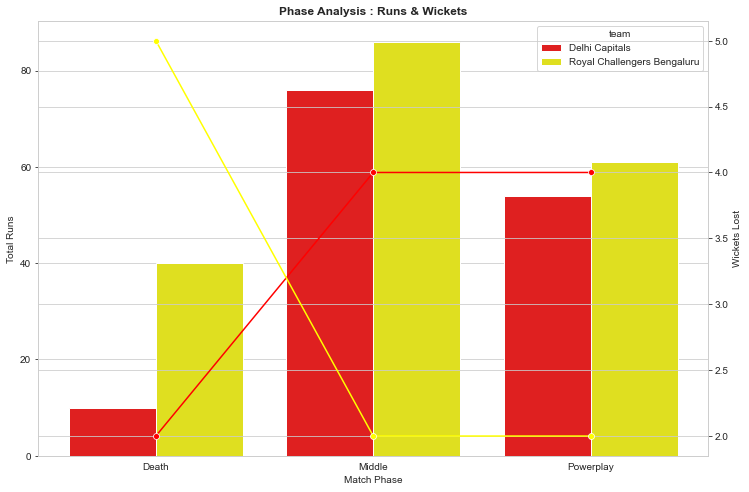

In [281]:
#plotting

custom_palette = ['red', 'yellow']
fig, ax1 = plt.subplots(figsize=(12,8))

# bar plot for runs scores in each phase
sns.barplot(data = phase_analysis, x='phase', y='runs_total', hue = 'team', ax = ax1,palette=custom_palette)
ax1.set_title('Phase Analysis : Runs & Wickets', fontweight='bold')
ax1.set_ylabel("Total Runs")
ax1.set_xlabel("Match Phase")

#line plot for Wickets lost

ax2=ax1.twinx()
sns.lineplot(data = phase_analysis, x = 'phase', y = 'wickets_taken', hue='team', marker='o', ax=ax2, legend = False,palette=custom_palette)
ax2.set_ylabel("Wickets Lost")

plt.show()


line plot represents the wickets lost in each phase while
bar chart shows runs in each phase

# strike rate

In [282]:
#strike rate 

batter_stats = df.groupby('batter').agg({'runs_batter':'sum','over':"count"}).rename(columns={"over": "balls_faced"}).reset_index()

batter_stats['strike_rate'] = (batter_stats["runs_batter"]/ batter_stats['balls_faced'])* 100

# sort batter by strike rate
batter_stats_sorted = batter_stats.sort_values(by="strike_rate", ascending = False)


In [283]:
batter_stats_sorted

,batter,runs_batter,balls_faced,strike_rate
6,J Fraser-McGurk,21,8,262.500000
18,V Kohli,27,14,192.857143
13,RM Patidar,52,34,152.941176
8,KV Sharma,6,4,150.000000
0,AR Patel,57,40,142.500000
19,WG Jacks,41,30,136.666667
2,C Green,32,24,133.333333
11,MK Lomror,13,10,130.000000
15,SD Hope,29,24,120.833333
4,F du Plessis,6,7,85.714286


In [284]:
# strike rate Across Different Phases

#merging phase information
batter_phase_stats = df.groupby(['batter','phase']).agg({'runs_batter':'sum','over':"count"}).rename(columns={"over": "balls_faced"}).reset_index()

# calculate strike rate for each batter-phase
batter_phase_stats['strike_rate'] = (batter_phase_stats["runs_batter"]/ batter_phase_stats['balls_faced'])* 100


In [285]:
batter_phase_stats

,batter,phase,runs_batter,balls_faced,strike_rate
0,AR Patel,Middle,47,32,146.875000
1,AR Patel,Powerplay,10,8,125.000000
2,Abishek Porel,Powerplay,2,3,66.666667
3,C Green,Death,24,14,171.428571
4,C Green,Middle,8,10,80.000000
5,DA Warner,Powerplay,1,2,50.000000
6,F du Plessis,Powerplay,6,7,85.714286
7,I Sharma,Death,0,5,0.000000
8,J Fraser-McGurk,Powerplay,21,8,262.500000
9,KD Karthik,Death,0,2,0.000000


In [286]:
# top performers based on strike rate

top_performers = batter_stats_sorted.head(5)['batter']

In [287]:
top_performers

6     J Fraser-McGurk
18            V Kohli
13         RM Patidar
8           KV Sharma
0            AR Patel
Name: batter, dtype: object

In [288]:
batter_phase_stats_top = batter_phase_stats[batter_phase_stats["batter"].isin(top_performers)]

In [289]:
batter_phase_stats_top

,batter,phase,runs_batter,balls_faced,strike_rate
0,AR Patel,Middle,47,32,146.875000
1,AR Patel,Powerplay,10,8,125.000000
8,J Fraser-McGurk,Powerplay,21,8,262.500000
10,KV Sharma,Death,6,4,150.000000
18,RM Patidar,Middle,30,23,130.434783
19,RM Patidar,Powerplay,22,11,200.000000
25,V Kohli,Powerplay,27,14,192.857143


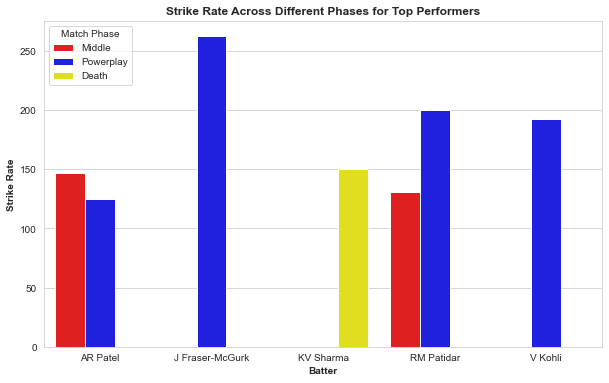

In [291]:
#plotting
custom_palette = ['red', 'blue', "yellow"]
plt.figure(figsize=(10, 6))
sns.barplot(data=batter_phase_stats_top, x='batter', y='strike_rate', hue='phase',palette = custom_palette)
plt.title('Strike Rate Across Different Phases for Top Performers',fontweight="bold")
plt.xlabel('Batter',fontweight="bold")
plt.ylabel('Strike Rate',fontweight="bold")
plt.legend(title='Match Phase')
plt.show()

# compare cumulative runs and wickets

In [172]:
# compare cumulative runs and wickets

df["cumulative_runs"] = df.groupby("team")["runs_total"].cumsum()
df["cumulative_wickets"]= df.groupby("team")["wickets_taken"].cumsum()

In [174]:
df

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_out,wicket_kind,fielders,wickets_taken,phase,cumulative_runs,cumulative_wickets
0,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[],0,Powerplay,0,0
1,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,1,0,1,NaN,NaN,[],0,Powerplay,1,0
2,Royal Challengers Bengaluru,0,F du Plessis,I Sharma,V Kohli,1,0,1,NaN,NaN,[],0,Powerplay,2,0
3,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[],0,Powerplay,2,0
4,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,2,0,2,NaN,NaN,[],0,Powerplay,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,Delhi Capitals,18,Kuldeep Yadav,Mohammed Siraj,I Sharma,1,0,1,NaN,NaN,[],0,Death,139,9
243,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,1,1,NaN,NaN,[],0,Death,140,9
244,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[],0,Death,140,9
245,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[],0,Death,140,9


In [175]:
# seprate team data
rcb_df = df[df["team"]== "Royal Challengers Bengaluru"]
dc_df = df[df["team"]== "Delhi Capitals"]

In [176]:
rcb_df

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_out,wicket_kind,fielders,wickets_taken,phase,cumulative_runs,cumulative_wickets
0,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[],0,Powerplay,0,0
1,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,1,0,1,NaN,NaN,[],0,Powerplay,1,0
2,Royal Challengers Bengaluru,0,F du Plessis,I Sharma,V Kohli,1,0,1,NaN,NaN,[],0,Powerplay,2,0
3,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[],0,Powerplay,2,0
4,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,2,0,2,NaN,NaN,[],0,Powerplay,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Royal Challengers Bengaluru,19,KV Sharma,Mukesh Kumar,C Green,0,1,1,NaN,NaN,[],0,Death,184,7
123,Royal Challengers Bengaluru,19,C Green,Mukesh Kumar,KV Sharma,0,0,0,NaN,NaN,[],0,Death,184,7
124,Royal Challengers Bengaluru,19,C Green,Mukesh Kumar,KV Sharma,0,0,0,NaN,NaN,[],0,Death,184,7
125,Royal Challengers Bengaluru,19,C Green,Mukesh Kumar,KV Sharma,1,0,1,KV Sharma,run out,"['SD Hope', 'Mukesh Kumar']",1,Death,185,8


In [177]:
dc_df

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_out,wicket_kind,fielders,wickets_taken,phase,cumulative_runs,cumulative_wickets
127,Delhi Capitals,0,DA Warner,Swapnil Singh,J Fraser-McGurk,1,0,1,NaN,NaN,[],0,Powerplay,1,0
128,Delhi Capitals,0,J Fraser-McGurk,Swapnil Singh,DA Warner,6,0,6,NaN,NaN,[],0,Powerplay,7,0
129,Delhi Capitals,0,J Fraser-McGurk,Swapnil Singh,DA Warner,1,0,1,NaN,NaN,[],0,Powerplay,8,0
130,Delhi Capitals,0,DA Warner,Swapnil Singh,J Fraser-McGurk,0,0,0,DA Warner,caught,['WG Jacks'],1,Powerplay,8,1
131,Delhi Capitals,0,Abishek Porel,Swapnil Singh,J Fraser-McGurk,1,0,1,NaN,NaN,[],0,Powerplay,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,Delhi Capitals,18,Kuldeep Yadav,Mohammed Siraj,I Sharma,1,0,1,NaN,NaN,[],0,Death,139,9
243,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,1,1,NaN,NaN,[],0,Death,140,9
244,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[],0,Death,140,9
245,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[],0,Death,140,9


In [178]:
# calculate overs for cumulative analysis

rcb_df["over_ball"] = rcb_df["over"]+(rcb_df.groupby("over").cumcount() + 1) / 6
dc_df["over_ball"] = dc_df["over"]+(dc_df.groupby("over").cumcount() + 1) / 6

C:\Users\91914\AppData\Local\Temp/ipykernel_7992/596137748.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rcb_df["over_ball"] = rcb_df["over"]+(rcb_df.groupby("over").cumcount() + 1) / 6
C:\Users\91914\AppData\Local\Temp/ipykernel_7992/596137748.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc_df["over_ball"] = dc_df["over"]+(dc_df.groupby("over").cumcount() + 1) / 6


In [179]:
rcb_df

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_out,wicket_kind,fielders,wickets_taken,phase,cumulative_runs,cumulative_wickets,over_ball
0,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[],0,Powerplay,0,0,0.166667
1,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,1,0,1,NaN,NaN,[],0,Powerplay,1,0,0.333333
2,Royal Challengers Bengaluru,0,F du Plessis,I Sharma,V Kohli,1,0,1,NaN,NaN,[],0,Powerplay,2,0,0.500000
3,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[],0,Powerplay,2,0,0.666667
4,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,2,0,2,NaN,NaN,[],0,Powerplay,4,0,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Royal Challengers Bengaluru,19,KV Sharma,Mukesh Kumar,C Green,0,1,1,NaN,NaN,[],0,Death,184,7,19.333333
123,Royal Challengers Bengaluru,19,C Green,Mukesh Kumar,KV Sharma,0,0,0,NaN,NaN,[],0,Death,184,7,19.500000
124,Royal Challengers Bengaluru,19,C Green,Mukesh Kumar,KV Sharma,0,0,0,NaN,NaN,[],0,Death,184,7,19.666667
125,Royal Challengers Bengaluru,19,C Green,Mukesh Kumar,KV Sharma,1,0,1,KV Sharma,run out,"['SD Hope', 'Mukesh Kumar']",1,Death,185,8,19.833333


In [180]:
dc_df

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_out,wicket_kind,fielders,wickets_taken,phase,cumulative_runs,cumulative_wickets,over_ball
127,Delhi Capitals,0,DA Warner,Swapnil Singh,J Fraser-McGurk,1,0,1,NaN,NaN,[],0,Powerplay,1,0,0.166667
128,Delhi Capitals,0,J Fraser-McGurk,Swapnil Singh,DA Warner,6,0,6,NaN,NaN,[],0,Powerplay,7,0,0.333333
129,Delhi Capitals,0,J Fraser-McGurk,Swapnil Singh,DA Warner,1,0,1,NaN,NaN,[],0,Powerplay,8,0,0.500000
130,Delhi Capitals,0,DA Warner,Swapnil Singh,J Fraser-McGurk,0,0,0,DA Warner,caught,['WG Jacks'],1,Powerplay,8,1,0.666667
131,Delhi Capitals,0,Abishek Porel,Swapnil Singh,J Fraser-McGurk,1,0,1,NaN,NaN,[],0,Powerplay,9,1,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,Delhi Capitals,18,Kuldeep Yadav,Mohammed Siraj,I Sharma,1,0,1,NaN,NaN,[],0,Death,139,9,18.833333
243,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,1,1,NaN,NaN,[],0,Death,140,9,19.000000
244,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[],0,Death,140,9,19.166667
245,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[],0,Death,140,9,19.333333


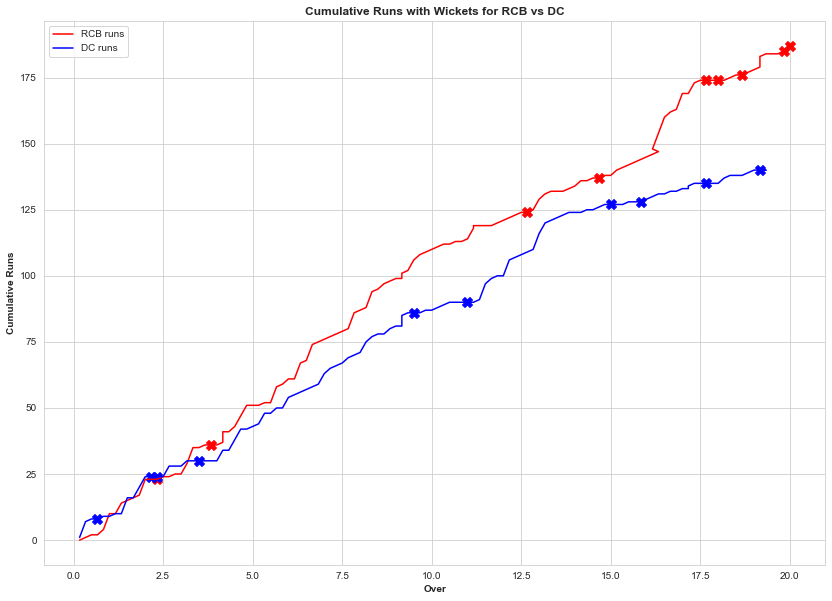

In [194]:
#plotting

fig, ax = plt.subplots(figsize=(14,10))

# for rcb
ax.plot(rcb_df["over_ball"], rcb_df["cumulative_runs"], color = "red", label = "RCB runs")
ax.scatter(rcb_df[rcb_df["wickets_taken"]==1]["over_ball"], rcb_df[rcb_df["wickets_taken"]==1]["cumulative_runs"], color="red",marker = "X", s=100)

# for DC
ax.plot(dc_df["over_ball"], dc_df["cumulative_runs"], color = "blue", label = "DC runs")
ax.scatter(dc_df[dc_df["wickets_taken"]==1]["over_ball"], dc_df[dc_df["wickets_taken"]==1]["cumulative_runs"], color="blue",marker = "X", s=100)

ax.set_title('Cumulative Runs with Wickets for RCB vs DC',fontweight="bold")
ax.set_xlabel('Over',fontweight="bold")
ax.set_ylabel('Cumulative Runs',fontweight="bold")
ax.legend()
plt.show()

The plot shows the cumulative runs scored by the team, with stars indicating the fall of wickets.

# Run Rate

In [198]:
# Run Rate

#run and wicket per over
per_over_df= df.groupby(["team","over"]).agg({"runs_total": "sum","wickets_taken":"sum"}).reset_index()



In [199]:
per_over_df

,team,over,runs_total,wickets_taken
0,Delhi Capitals,0,9,1
1,Delhi Capitals,1,15,0
2,Delhi Capitals,2,4,2
3,Delhi Capitals,3,2,1
4,Delhi Capitals,4,13,0
5,Delhi Capitals,5,11,0
6,Delhi Capitals,6,9,0
7,Delhi Capitals,7,8,0
8,Delhi Capitals,8,10,0
9,Delhi Capitals,9,6,1


In [200]:
# run rate for each over

per_over_df["run_rate"]= (per_over_df["runs_total"]/6)

In [201]:
per_over_df

,team,over,runs_total,wickets_taken,run_rate
0,Delhi Capitals,0,9,1,1.500000
1,Delhi Capitals,1,15,0,2.500000
2,Delhi Capitals,2,4,2,0.666667
3,Delhi Capitals,3,2,1,0.333333
4,Delhi Capitals,4,13,0,2.166667
5,Delhi Capitals,5,11,0,1.833333
6,Delhi Capitals,6,9,0,1.500000
7,Delhi Capitals,7,8,0,1.333333
8,Delhi Capitals,8,10,0,1.666667
9,Delhi Capitals,9,6,1,1.000000


In [202]:
# seprate data for each team

rcb_per_over_df = per_over_df[per_over_df["team"]=="Royal Challengers Bengaluru"]
dc_per_over_df = per_over_df[per_over_df["team"]=="Delhi Capitals"]

In [203]:
rcb_per_over_df

,team,over,runs_total,wickets_taken,run_rate
20,Royal Challengers Bengaluru,0,10,0,1.666667
21,Royal Challengers Bengaluru,1,13,0,2.166667
22,Royal Challengers Bengaluru,2,2,1,0.333333
23,Royal Challengers Bengaluru,3,12,1,2.000000
24,Royal Challengers Bengaluru,4,14,0,2.333333
25,Royal Challengers Bengaluru,5,10,0,1.666667
26,Royal Challengers Bengaluru,6,15,0,2.500000
27,Royal Challengers Bengaluru,7,11,0,1.833333
28,Royal Challengers Bengaluru,8,12,0,2.000000
29,Royal Challengers Bengaluru,9,11,0,1.833333


In [204]:
dc_per_over_df

,team,over,runs_total,wickets_taken,run_rate
0,Delhi Capitals,0,9,1,1.500000
1,Delhi Capitals,1,15,0,2.500000
2,Delhi Capitals,2,4,2,0.666667
3,Delhi Capitals,3,2,1,0.333333
4,Delhi Capitals,4,13,0,2.166667
5,Delhi Capitals,5,11,0,1.833333
6,Delhi Capitals,6,9,0,1.500000
7,Delhi Capitals,7,8,0,1.333333
8,Delhi Capitals,8,10,0,1.666667
9,Delhi Capitals,9,6,1,1.000000


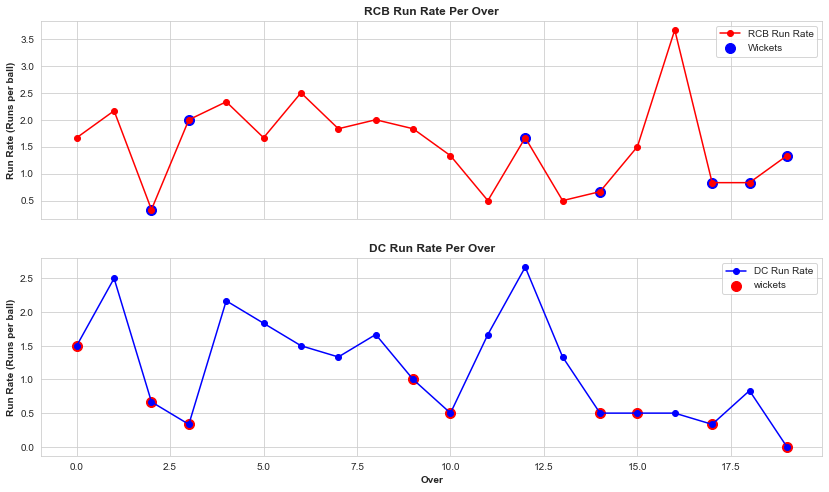

In [222]:
#plotting

fig, (ax1,ax2) = plt.subplots(2,1, figsize=(14,8), sharex = True)

#RCB
ax1.plot(rcb_per_over_df['over'], rcb_per_over_df['run_rate'], marker='o', color='red', label='RCB Run Rate')
ax1.scatter(rcb_per_over_df[rcb_per_over_df['wickets_taken'] > 0]['over'], rcb_per_over_df[rcb_per_over_df['wickets_taken'] > 0]['run_rate'], color='blue', s=100, label='Wickets')
ax1.set_title('RCB Run Rate Per Over', fontweight="bold")
ax1.set_ylabel('Run Rate (Runs per ball)', fontweight="bold")
ax1.legend()

#DC
ax2.plot(dc_per_over_df["over"], dc_per_over_df["run_rate"], marker="o", color='blue', label="DC Run Rate")
ax2.scatter(dc_per_over_df[dc_per_over_df["wickets_taken"]> 0]["over"], dc_per_over_df[dc_per_over_df["wickets_taken"]>0]['run_rate'], color= 'red', s = 100, label="wickets")
ax2.set_title('DC Run Rate Per Over', fontweight="bold")
ax2.set_xlabel('Over',fontweight="bold")
ax2.set_ylabel('Run Rate (Runs per ball)',fontweight="bold")
ax2.legend()

plt.show()